In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 14.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

In [11]:
import os 

os.listdir("/kaggle/input/myimgadfasdf")

['cha.jpg']

In [12]:
image = Image.open("/kaggle/input/myimgadfasdf/cha.jpg")

In [19]:
print(image.height)
print(image.width)
print(image.size)

681
620
(620, 681)


### 사이즈 변환

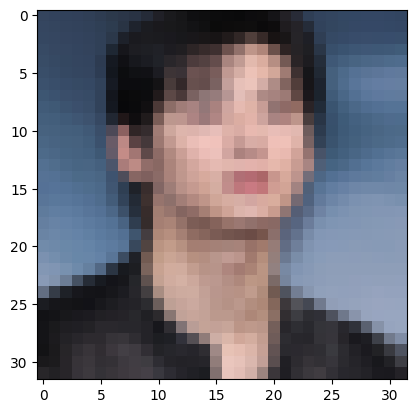

In [30]:
transform = transforms.Compose(
    [
        transforms.Resize(size=(32,32)),
        transforms.ToTensor()
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image.permute(1,2,0))

#### 이미지 회전 및 대칭

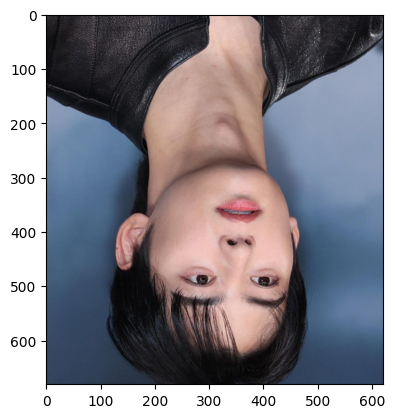

In [44]:
transform = transforms.Compose(
    [
        # 회전 클래스
        transforms.RandomRotation(degrees=180, expand=False, center=None),
        # 대칭 클래스 
        # p는 수행 확률
        transforms.RandomHorizontalFlip(p=1),
        transforms.RandomVerticalFlip(p=1)
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)

#### 자르기, 패딩

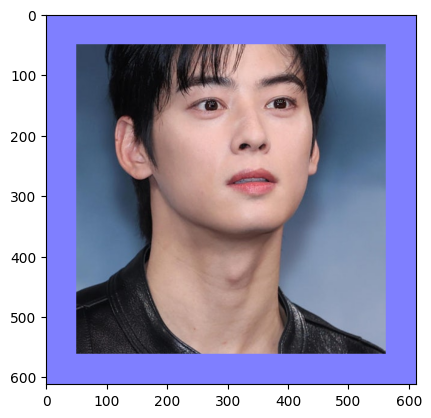

In [45]:
transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)

#### 기하학적 변경

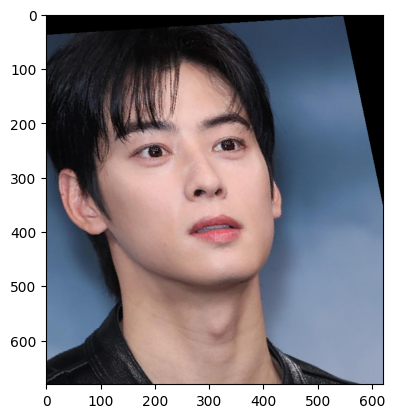

In [47]:
transform = transforms.Compose(
    [
        # 각도(degrees), 
        # 이동(translate)
        # 척도(scale)
        # 전단(shear)
        transforms.RandomAffine(
            degrees=30, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)

#### 색상 변경 

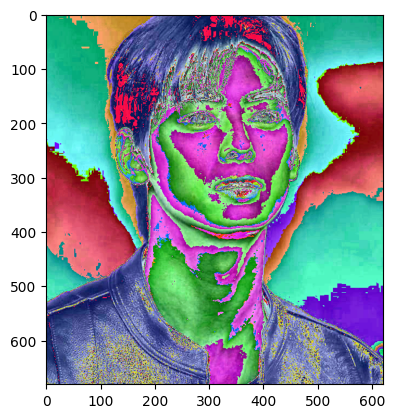

In [48]:
transform = transforms.Compose(
    [
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

#### 노이즈

In [51]:
from imgaug import augmenters as iaa
import numpy as np

class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            iaa.Rain(speed=(0.3, 0.7))
        ])
    
    def __call__(self, images): 
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)


transform = transforms.Compose([
    IaaTransforms()
])
transformed_image = transform(image)
plt.imshow(transformed_image)

(681, 620, 3) uint8


/usr/local/lib/python3.11/dist-packages/imgaug/augmenters/meta.py:3368: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  augmenter_active = np.zeros((nb_rows, len(self)), dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

#### 이미지 지우기 

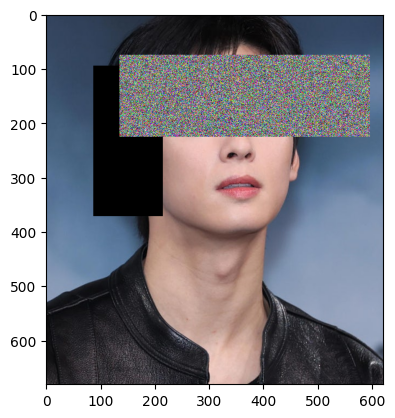

In [57]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])
transformed_image = transform(image)
plt.imshow(transformed_image)

In [64]:
from urllib.request import urlretrieve
urlretrieve("https://cdn.imweb.me/upload/S202207202685e30f16e24/8b48c67f8cdf6.jpeg", "/kaggle/working/img_test.jpg")

('/kaggle/working/img_test.jpg', <http.client.HTTPMessage at 0x7a8606066710>)

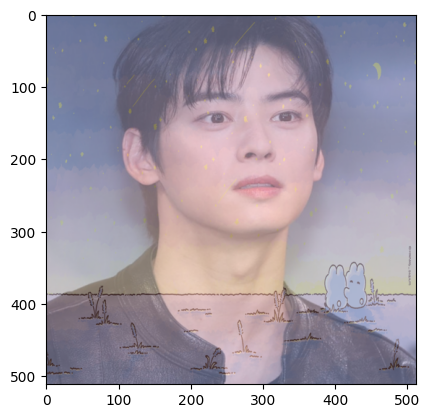

In [66]:
class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("/kaggle/working/img_test.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)